In [5]:
import pandas as p
import seaborn as sns
import statsmodels.formula.api as smf

# allow plots to appear directly in the notebook
%matplotlib inline

In [6]:
df = p.read_csv('Data/train_v2.csv')

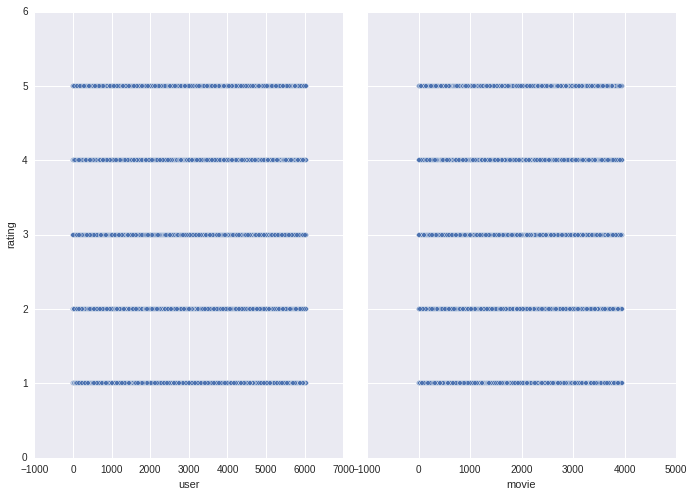

In [7]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['user', 'movie'], y_vars='rating', size=7, aspect=0.7)

In [11]:
# Trying Multiple Linear Regression
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='rating ~ user + movie', data=df).fit()

# print the coefficients
lm1.params

Intercept    3.682208
user         0.000007
movie       -0.000066
dtype: float64

In [22]:
# Testing
df = p.read_csv('Data/test_v2.csv')
values = [['ID', 'rating']]
for index, row in df.iterrows():
    rating = int(round(lm1.params.Intercept + lm1.params.user*row['user'] + lm1.params.movie*row['movie']))
    values += [[row['ID'], rating]]


In [23]:
df = p.DataFrame(values)
with open('Data/Regression-results.csv', 'w') as f:
    f.write(df.to_csv(index=False, header=False))